<span style="color:red">Abgegeben von (Name, Vorname):</span> 
**Elsherif, Mohamed**

In [1]:
import nltk

Immer griffbereit:
- Website: https://www.nltk.org/
- Buch: https://www.nltk.org/book/ch07.html
- Module: https://www.nltk.org/py-modindex.html
- Beispiele: http://www.nltk.org/howto/

<br>
<font size="6"><strong>12. Sitzung: Word Embeddings</strong></font>
<br>

Word Embeddings, d.h. **reellwertige Vektoren**, sind ein zentrales Werkzeug der NLP zur Repräsentation von Wort-Bedeutungen und ein wesentlicher Faktor der sprunghaften Entwicklung von NLP-Anwendungen in den letzten Jahren. Dabei existiert die Idee der distributionellen Semantik schon seit mindestens 65 Jahren und hat bereits in den 90ern im Bereich des Information Retrieval breite praktische Anwendung gefunden. Doch erst mit der Verfügbarkeit zweier entscheidender Komponenten ist dieses Verfahren auch in anderen – ja eigentlich allen – Bereichen des NLP richtig eingeschlagen: Hardware-Leistung (insb. Parallelisierung) und Daten. 

In diesem Notebook werden wir die Idee und Erstellung von Word Embeddings beleuchten und schließlich eine uns schon bekannte Anwendung, **Word Sense Disambiguation (WSD)**, damit ausstatten. 

# Distributionelle Semantik

Die Semantik – also Bedeutung – eines sprachlichen Zeichens kann auf sehr unterschiedliche Arten repräsentiert werden: 
- als Graph wie bei WordNet
- als Mengen von Objekten, Eigenschaften und Relationen in einem "Modell"
- als Ausdrücke einer logische Sprache wie in der Prädikatenlogik
- als Fließtextbeschreibungen wie in Wikipedia
- als Objekte anderer Modalitäten wie Bild, Ton, Video etc. 

Hier ein Beispiel für das Wort *Hund*:

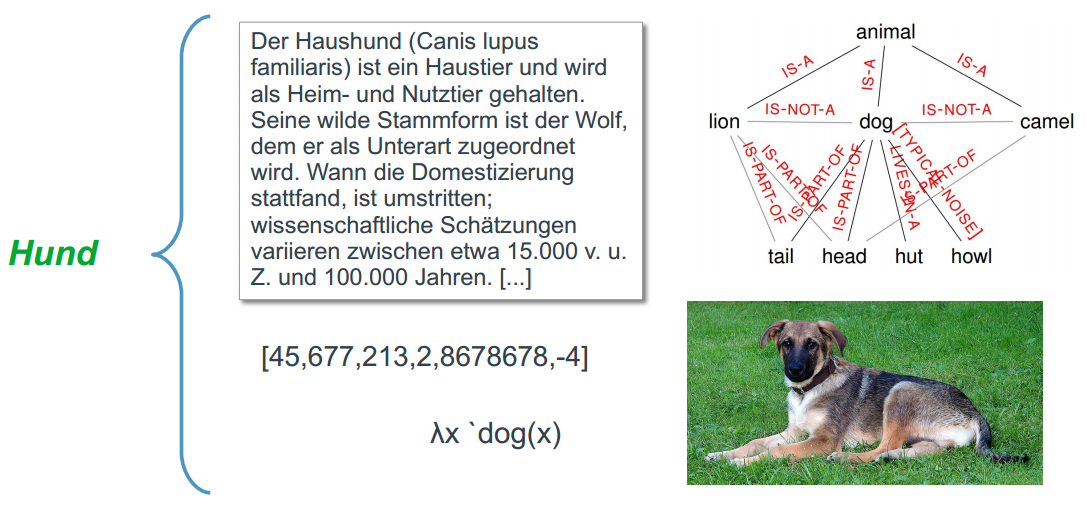

Jede dieser Repräsentationsarten hat spezifische Stärken und Schwächen, und es hängt von der konkreten Anwendung ab, welche man wählen sollte. 

Die **distributionelle Semantik** unterscheidet sich von den erwähnten Repräsentationsformen durch den Bezug auf den konkreten **Sprachgebrauch**, d.h. insbesondere die linguistische Umgebung, in der die Worte und Wortgruppen einer Äußerung eingebettet sind. Kein geringerer als [Ludwig Wittgenstein](https://de.wikipedia.org/wiki/Ludwig_Wittgenstein) geht sogar soweit, beides gleichzusetzen:  

- “Die Bedeutung eines Wortes ist sein Gebrauch in der Sprache.” (Wittgenstein, Philosophische Untersuchungen, 1953)

Prominente Sprachwissenschaftler wie [John Firth](https://en.wikipedia.org/wiki/John_Rupert_Firth) oder [Zellig Harris](https://en.wikipedia.org/wiki/Zellig_Harris) drücken sich etwas vorsichtiger aus, doch die distributionelle Idee wird auch von ihnen in den folgenden Zitaten unterstrichen, die daher in keiner Darstellung fehlen dürfen:

- “You shall know a word by the company it keeps.” (John Firth, 1957)
- “Difference of meaning correlates with difference of distribution.” (Zellig Harris, 1954)

Man kann diese Zeugnisse einer **distributionellen Idee der Wortbedeutung** in drei Hypothesen fassen:

1. Der Kontext eines Worts im Gebrauch gibt Aufschluss über seine Bedeutung.
2. Haben Worte eine ähnliche Bedeutung, dann stehen sie auch in ähnlichen Kontexten.
   - Stehen Worte in ähnlichen Kontexten, dann haben sie auch eine ähnliche Bedeutung.
3. Bedeutung kann als Statistik des Kovorkommens/der Kookkurrenz repräsentiert werden.

Insbesondere die dritte Hypothese (Bedeutung ~ Statistik der Kookkurrenz) klingt so, als ob eine maschinelle Umsetzung leicht möglich sein sollte. Doch wie geht man hier genau vor, und was kann man dann damit anstellen?

# Generierung der Word Embeddings

Wortbedeutung als **Statistik der Kookkurrenz** (oder des Kovorkommens) zu repräsentieren, heißt im Grunde: 

    Für jedes Wort wird ermittelt, wie oft es mit jedem anderen Wort im konkreten Sprachgebrauch auftritt. 
    
Die syntaktische Struktur, d.h. in welcher Reihenfolge die Wortformen stehen, wird dabei in der Regel weitgehend ignoriert. Man nennt das einen **Bag-of-Words-Ansatz**. 

Wir werden also mit der Konstruktion von **Kookkurrenz-Matrizen** beginnen, danach diese Matrizen komprimieren (oder "verdichten") und visualisieren. Mathematisch betrachtet sind Word Embeddings nichts weiter als Zeilen (oder Spalten) solcher "verdichteter", real-wertiger Matrizen. Der Terminus "Wortvektor" ist ein Oberbegriff. 

## Kookkurrenz-Matrizen

Für die Konstruktion von Kookkurenz-Matrizen in Python gibt es das `sklearn`-Modul [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Es gibt generell zwei Parameter, die festgelegt werden müssen:

- das Textcorpus, das den Sprachgebrauch repräsentiert
- das Kontextfenster, in dem zwei Worttoken als kovorkommend gelten

### Generierung

Wir starten bescheiden mit ein paar Sätzen des Brown-Corpus, wobei das Kontextfenster ein Satz sei. Glücklicherweise ist das Brown-Corpus schon nach Sätzen tokenisiert (siehe `sents()`). Bei einem rohen Corpus könnte man den Satztokenisierer von NLTK verwenden (`nltk.tokenize.sent_tokenize()`). Prinzpiell kann man aber beliebige Teilstrings des Korpus als Kontextfenster angeben. Mittels Pandas wird die Ausgabe von `CountVectorizer` als Tabelle dargestellt.  

In [2]:
import pandas as pd
from nltk.corpus import brown
from sklearn.feature_extraction.text import CountVectorizer

sentences = [' '.join(sent) for sent in brown.sents()[:4]]
cv = CountVectorizer(lowercase=True,    # empfehlenswert im Englischen
                     stop_words=None,   # 'english' oder None
                     ngram_range=(1, 1),  # N-Gramme
                     )
sentence_matrix = cv.fit_transform(sentences)

# print(cv.vocabulary_)
# print(sentence_counts)

# Darstellung als Tabelle mit Pandas
dimensions = cv.get_feature_names_out()
df = pd.DataFrame(data=sentence_matrix.toarray(),
                  columns=dimensions,
                  index=["s"+str(n) for n in range(len(sentence_matrix.toarray()))])
display(df)

,all,allen,an,and,any,atlanta,been,by,charge,charged,...,that,the,this,to,took,voters,was,which,widespread,won
s0,0,0,1,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
s1,1,0,0,1,0,1,0,0,1,0,...,1,7,0,0,0,0,1,2,0,0
s2,0,1,0,0,0,0,1,2,0,1,...,0,2,0,1,0,0,1,1,0,1
s3,0,0,0,1,0,0,0,0,0,0,...,0,5,1,0,0,1,1,0,1,0


In der ausgegebenen Tabelle bilden die Sätze die Zeilen und die Wortformen die Spalten. Eine Zelle $a_{ij}$ enthält also die Vorkommenshäufigkeit von Wort $j$ im Satz $i$.

Die **Wortmatrix** (mit Worformen als Spalten und Zeilen) kann aus dieser Satzmatrix durch Multiplikation mit der Transponierung abgeleitet werden.

In [3]:
# Multiplikation mit der Transponierung der Satz-Matrix
import pandas as pd
word_matrix = (sentence_matrix.T * sentence_matrix)
# Einfügen einer Null-Diagonalen
word_matrix.setdiag(0)

# Darstellung als Tabelle mit Pandas
dimensions = cv.get_feature_names_out()
rows = dimensions
df = pd.DataFrame(data=word_matrix.toarray(),
                  columns=dimensions,
                  index=rows)
display(df)

,all,allen,an,and,any,atlanta,been,by,charge,charged,...,that,the,this,to,took,voters,was,which,widespread,won
all,0,0,0,1,0,1,0,0,1,0,...,1,7,0,0,0,0,1,2,0,0
allen,0,0,0,0,0,0,1,2,0,1,...,0,2,0,1,0,0,1,1,0,1
an,0,0,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
and,1,0,0,0,0,1,0,0,1,0,...,1,12,1,0,0,1,2,2,1,0
any,0,0,1,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
voters,0,0,0,1,0,0,0,0,0,0,...,0,5,1,0,0,0,1,0,1,0
was,1,1,0,2,0,1,1,2,1,1,...,1,14,1,1,0,1,0,3,1,1
which,2,1,0,2,0,2,1,2,2,1,...,2,16,0,1,0,0,3,0,0,1
widespread,0,0,0,1,0,0,0,0,0,0,...,0,5,1,0,0,1,1,0,0,0


Im Sinne der distributionellen Semantik entsprechen dann die einzelnen Zeilen (oder Spalten) den Wortbedeutungen, das heißt, die Wortform *all* hat den **distributionellen Vektor** $[0,0,0,1,0,1,0,0,1,...]$ als Bedeutung.

### Desiderata

Solche Kovorkommens-Tabelle haben mehrere problematische Eigenschaften:
- Viele wenn nicht die meisten der Zellen enthalten eine Null. Die Tabelle ist also **"sparse"**. Dies verbessert sich nicht, wenn wir das gesamte Brown-Korpus in eine Kookkurrenz-Matrix umwandeln – eher im Gegenteil. Probieren Sie es gerne aus! 
- Die Tabelle wächst **quadratisch** und wird schnell ziemlich groß.
- Die Anzahl und Anordnung der Dimensionen hängt vom Wortformeninventar des Corpus abängt. Wir können die generierten Repräsentationen unterschiedlicher Corpora also **schwer miteinander vergleichen**, außer man legt sich auf ein Wortformeninventar und eine Spaltenbeschriftung fest (was manchmal gemacht wird).

### Dimensionsreduktion

Zumindest was die **Dichte** der Matrix und die **Anzahl der Dimensionen** betrifft, lässt sich leicht Abhilfe schaffen. Das einschlägige Verfahren ist hier die [**Singulärwertzerlegung (Singular Value Decomposition, SVD)**](https://de.wikipedia.org/wiki/Singul%C3%A4rwertzerlegung), für die `sklearn` das Modul [`TruncatedSVD`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) bereithält.

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
# mit `n_components` lässt sich die Anzahl der Dimensionen steuern
svd = TruncatedSVD(n_components=5)
svd_word_matrix = svd.fit_transform(word_matrix)

# Darstellung als Tabelle mit Pandas
dimensions = ["d"+str(n+1) for n in range(len(svd_word_matrix[0]))]
rows = cv.get_feature_names_out()
df = pd.DataFrame(data=svd_word_matrix,
                  columns=dimensions,
                  index=rows)
display(df)

,d1,d2,d3,d4,d5
all,9.019948,2.265934,-1.662808,-0.646996,-1.973697
allen,3.523411,0.408369,4.905272,-0.542176,-0.027261
an,2.103792,-0.021790,0.352269,3.921330,-0.064048
and,14.895858,4.014886,-2.594977,-0.904209,1.246180
any,2.103792,-0.021790,0.352269,3.921330,-0.064048
...,...,...,...,...,...
voters,6.012914,1.665467,-1.021702,-0.308573,3.297189
was,18.221097,4.528083,2.077410,-1.344955,1.153150
which,20.798145,5.388422,1.388086,-1.496219,-3.184419
widespread,6.012914,1.665467,-1.021702,-0.308573,3.297189


Der Preis des SVD-Verfahrens ist der Verlust an Information, auch was die Interpretierbarkeit der Dimensionen betrifft. Für das menschliche Auge sind die neuen Dimensionen nicht mehr interpretierbar und die Vektorrepräsentationen werden zu einer "Black-Box".

### Visualisierung

Durch das SVD-Verfahren können die Bedeutungsvektoren auf eine beliebige Anzahl von Dimensionen reduziert werden – also auch auf zwei oder drei Dimensionen. Diese "gestauchten" Vektoren können dafür verwendet werden, die räumliche Beziehung zwischen diesen Vektoren zu visualisieren.

Wir werden dies anhand der Wort-Vektoren einmal durchspielen, die für das gesamte Brown-Corpus mit dem obigen Verfahren generiert werden.

In [5]:
# Generierung der Wort-Vektoren aus dem gesamten Brown-Corpus und Reduktion auf zwei Dimensionen durch SVD.
from sklearn.decomposition import TruncatedSVD
import numpy as np
from nltk.corpus import brown
from sklearn.feature_extraction.text import CountVectorizer

sentences = [' '.join(sent) for sent in brown.sents()]
cv = CountVectorizer(lowercase=True,    # empfehlenswert im Englischen
                     stop_words=None,   # 'english' oder None
                     ngram_range=(1, 1),  # N-Gramme
                     )
sentence_matrix = cv.fit_transform(sentences)

# Transponierung und Multiplikation der Matrix
word_matrix = (sentence_matrix.T * sentence_matrix)
# Einfügen einer Null-Diagonalen
word_matrix.setdiag(0)

# mit `n_components` lässt sich die Anzahl der Dimensionen steuern
svd = TruncatedSVD(n_components=2)
svd_word_matrix = svd.fit_transform(word_matrix)

Mit `matplotlib` können wir die Wortvektoren in einem zweidimensionalen Streudiagramm (Scatter Plot) darstellen.

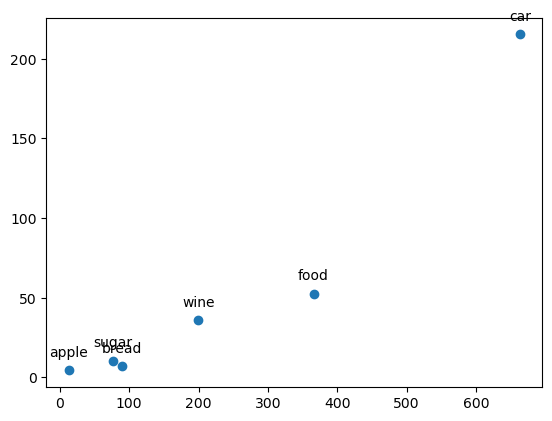

In [6]:
import numpy as np
import matplotlib.pyplot as plt
words = ['bread', 'apple', 'food', 'wine', 'sugar', 'car']
xs = [svd_word_matrix[cv.vocabulary_[w]][0] for w in words]
ys = [svd_word_matrix[cv.vocabulary_[w]][1] for w in words]


def draw_labeled_scatter_plot(xs, ys, labels):
    # zeichne das Diagramm
    plt.scatter(xs, ys)

    # füge die Label hinzu
    i = 0
    for x, y in zip(xs, ys):

        label = labels[i]
        i += 1

        plt.annotate(label,
                     (x, y),
                     textcoords="offset points",  # Wie soll die relative Position bestimmt werden?
                     xytext=(0, 10),  # Abstand
                     ha='center')  # horizontale Ausrichtung


draw_labeled_scatter_plot(xs, ys, words)

Es wirkt so, als ob Wortformen mit einer ähnlichen Bedeutung tatsächlich (manchmal) näher zusammenliegen als Wortformen, dies sich semantisch stärker unterscheiden.

## Word2Vec

Distributionelle Vektoren per Kokkurrenz-Matrix und SVD zu generieren, ist beileibe nicht die einzige Methode. Weitaus populärer ist die [bei Google](https://code.google.com/archive/p/word2vec/) entwickelte **Word2Vec-Methode** von [Mikolov et al. (2013)](https://arxiv.org/abs/1301.3781). 

Den riesigen Erfolg von Word2Vec machen im Wesentlichen **zwei Faktoren** aus: 
- die Schnelligkeit der Vektorenerstellung und 
- die semantische Qualität der Vektoren.

Zudem gibt es viele frei verfügbare Implementierungen und große vortrainierte Word2Vec-Lexika, die man herunterladen und direkt verwenden kann.  

 ### Funktionsweise
 
In diesem Notebook werden wir nicht im Detail auf die Funktionsweise eingehen; dafür gibt es [viele ausführliche Tutorials im Netz](https://duckduckgo.com/?q=word2vec+tutorial).

Soviel sei aber gesagt: 
- Word2Vec umfasst eigentlich zwei unabhängige, aber ähnliche Verfahren: **SkipGram** und **CBOW** (Continuous Bag of Words).
- Beiden Verfahren ist gemein, dass die Wortvektoren von Worten, die miteinander in einem Kontextfenster auftreten, in sehr kleinen Schritten angenähert werden. Dagegen wird die Distanz zwischen Wortvektoren vergrößert, wenn die Worte nicht miteinander auftreten.

Beispielhaft der Aufbau von CBOW:

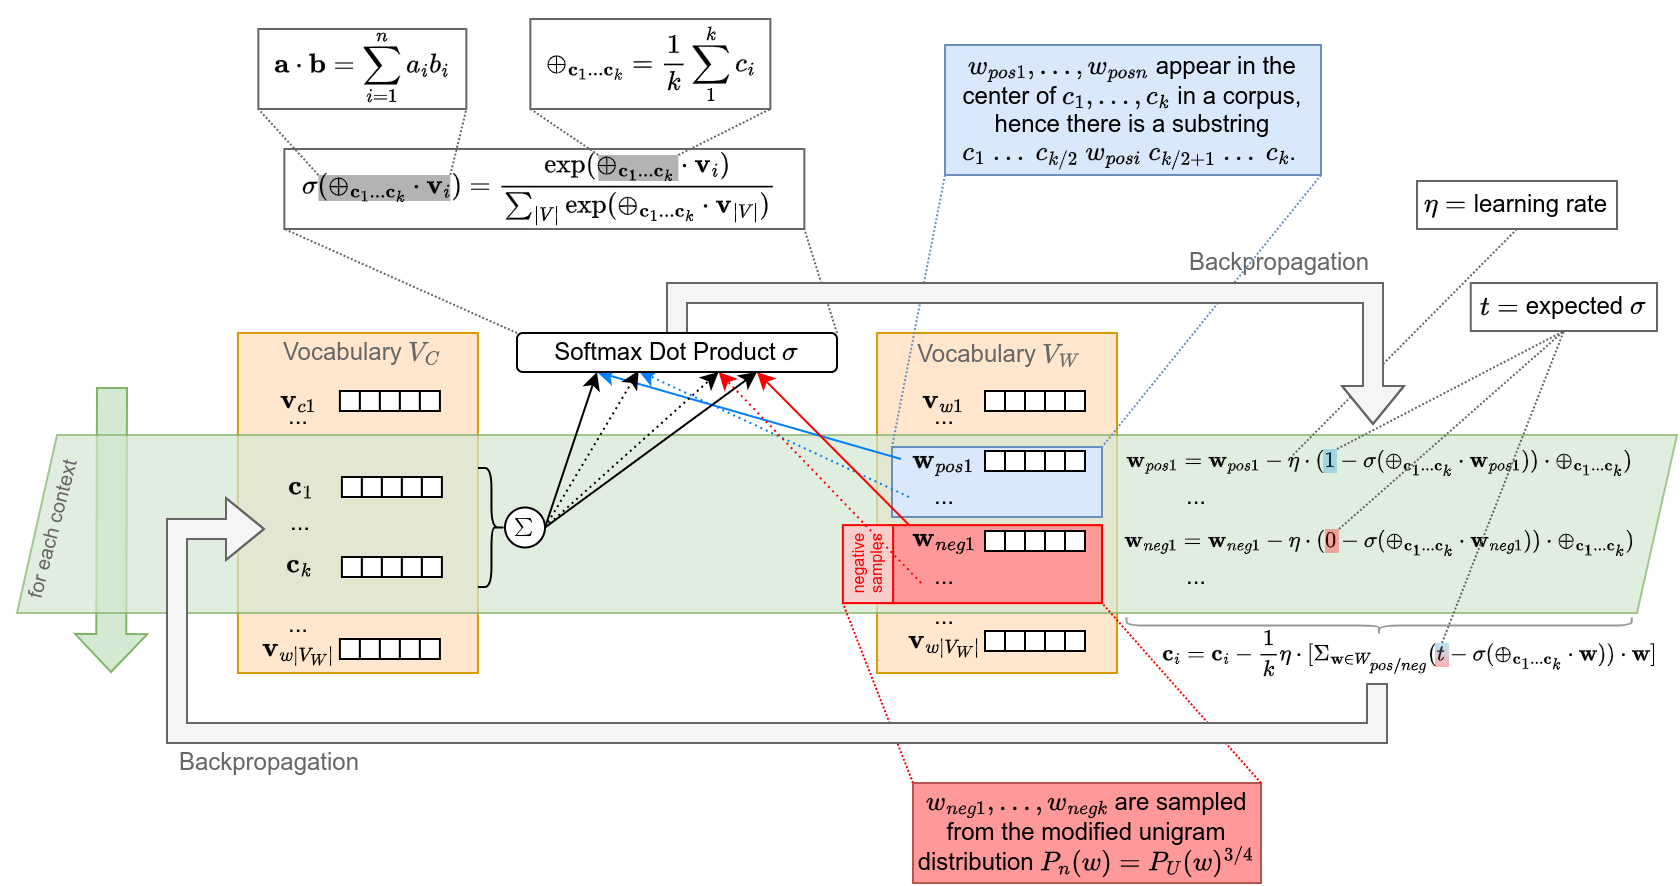

### Generierung mit Gensim

Im Folgenden werden wir [`gensim`](https://radimrehurek.com/gensim/) als Frontend für Word2Vec verwenden. Eventuell muss das `gensim`-Paket zuvor noch per `pip` installiert werden. 

    pip install gensim

Ist das erledigt, kann per [`gensim.models.Word2Vec(corpus)`](https://radimrehurek.com/gensim/models/word2vec.html) das Vektorenlexikon für ein Corpus erstellt werden. Zu beachten ist dabei nur, dass das Corpus satz- **und** worttokenisiert vorliegt.

In [7]:
import gensim
from nltk.corpus import brown
train_set = brown.sents()  # Corpus mit Satz- und Worttokenisierung
# Word2Vec: Das Standard-Verfahren ist hier übrigens CBOW (d.h. `sg=0`).
w2v_model = gensim.models.Word2Vec(train_set, vector_size=100, window=5)
# Tip bei Problemen: Erst numpy aktualisieren, dann gensim installieren, dann den Kernel neu starten.
w2v_model.save('brown.embedding')  # speichere das Modell auf der Festplatte
# w2v_model = gensim.models.Word2Vec.load('brown.embedding') # so lädt man ein gespeichertes Modell

Der Teil des Modells mit dem Vektorenlexikon steckt in `w2v_model.wv` (die sogenannten [`KeyedVectors`](https://radimrehurek.com/gensim/models/keyedvectors.html)) und hierfür gibt es eine Reihe von nützlichen Methoden, zum Beispiel:
- `w2v_model.wv[key]` $\to$ Vektor von `key` als `array` 
- `w2v_model.wv.similarity(key1,key2)` $\to$ Kosinus-Ähnlichkeit der Vektoren von `key1` und `key2`
- `w2v_model.wv.most_similar(positive=[key], topn=10)` $\to$ die `topn` ähnlichsten Wortformen und deren Kosinus-Ähnlichkeit zu `key`
- `w2v_model.wv.closer_than(key1,key2)` $\to$ eine Liste von Wortformen, die `key1` ähnlicher sind als `key2`
- `w2v_new_model.wv.rank(key1, key2)` $\to$ der Rang der Kosinus-Ähnlichkeit von `key1` und `key2` im Vergleich zu allen anderen Paaren mit `key1` (je höher der Rang, desto höher die Kosinus-Ähnlichkeit)
- `w2v_model.wv.rank_by_centrality([key1,...,keyn]))` $\to$ Rangordnung der Wortformen `key1`, ...,`keyn` hinsichtlich des Abstands zum Schwerpunkt (Centroid) ihrer Vektoren
- `w2v_model.wv. relative_cosine_similarity(key1,key2)` $\to$ Die gewichtete (antisymmetrische) Kosinusähnlichkeit zwischen `key1` und `key2` bezogen auf die `topn` ähnlichsten Wortformen zu `key1`, d.h. $rcs_n(w_i, w_j) = \frac{\text{cosine_similarity}(w_i,w_j)}{\sum_{w_c \in TOP_n}\text{cosine_similarity}(w_i,w_c)}$

Gehen wir diese Methode im Einzelnen durch:

In [8]:
w2v_model.wv['university']

array([ 0.11290697,  0.25631627,  0.20034048,  0.11235467, -0.06395088,
       -0.33235213,  0.20454077,  0.34572166, -0.30704504, -0.28150895,
        0.16879235, -0.22851954,  0.18935117,  0.16798978,  0.24301401,
       -0.16336305,  0.27054042, -0.14470458, -0.5240574 , -0.5167712 ,
        0.2844992 , -0.1138465 ,  0.48452434,  0.07608562, -0.05910793,
       -0.13381435, -0.23114724,  0.01650125, -0.21094497,  0.23467514,
        0.21826994, -0.0669921 ,  0.2812049 , -0.3713134 , -0.17828584,
        0.05804087, -0.18866798, -0.05149842, -0.3429107 , -0.05992081,
        0.01206331, -0.26862472,  0.17945093,  0.1155806 ,  0.2031478 ,
       -0.00689971, -0.01976472, -0.02479578,  0.10075833,  0.31086546,
        0.01595671, -0.28659332, -0.25125852, -0.18974964, -0.10735203,
       -0.22970589,  0.17761678,  0.05193053, -0.06222349, -0.07890359,
        0.0291458 ,  0.2003662 , -0.03691994, -0.16873111, -0.18870002,
        0.45107082,  0.02186265,  0.2843242 , -0.26225224,  0.36

In [9]:
w2v_model.wv.similarity('university', 'school')

0.8153394

In [10]:
w2v_model.wv.most_similar(positive=['university'], topn=5)

[('membership', 0.9540830850601196),
 ('profession', 0.9536039233207703),
 ('neighborhood', 0.9526623487472534),
 ('congregation', 0.9513150453567505),
 ('selection', 0.9479056596755981)]

In [11]:
w2v_model.wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air'])

'water'

In [12]:
w2v_model.wv.closer_than('university', 'school')

['family',
 'city',
 'service',
 'field',
 'study',
 'position',
 'special',
 'church',
 'company',
 'air',
 'age',
 'level',
 'control',
 'sound',
 'town',
 'value',
 'land',
 'English',
 'party',
 'music',
 'personal',
 'society',
 'center',
 'West',
 'private',
 'living',
 'pressure',
 'basis',
 'South',
 'modern',
 'conditions',
 'particular',
 'material',
 'stage',
 'space',
 'board',
 'fire',
 'figure',
 'class',
 'college',
 'industry',
 'U.S.',
 'low',
 'terms',
 'beginning',
 'religious',
 'range',
 'property',
 'paper',
 'final',
 'growth',
 'meeting',
 'Congress',
 'working',
 'building',
 'similar',
 'purpose',
 'Christian',
 'issue',
 'knowledge',
 'points',
 'market',
 'results',
 'increased',
 'production',
 'methods',
 'size',
 'reading',
 'ideas',
 'stock',
 'color',
 'method',
 'population',
 'normal',
 'strength',
 'food',
 'Federal',
 'trade',
 'record',
 'continued',
 'peace',
 'member',
 'research',
 'using',
 'influence',
 'section',
 'direction',
 'summer',
 'li

In [13]:
w2v_model.wv.rank('university', 'membership')

1

In [14]:
w2v_model.wv.rank_by_centrality(['university', 'school', 'the'])

[(0.91462815, 'school'), (0.85624886, 'university'), (0.7108631, 'the')]

In [15]:
w2v_model.wv.relative_cosine_similarity('university', 'school', topn=10)

0.08613787945919003

### Visualisierung

Die Word2Vec-Modelle können genauso visualisiert werden wie die Kookkurrenz-Matrix oben, sobald die Anzahl der Dimensionen auf zwei oder drei reduziert wird. Wir verwenden hier der Vergleichbarkeit wegen wieder SVD.

In [16]:
w2v_matrix = np.array([w2v_model.wv[key]
                      for key in w2v_model.wv.key_to_index.keys()])
svd_w2v_matrix = TruncatedSVD(n_components=2).fit_transform(w2v_matrix)

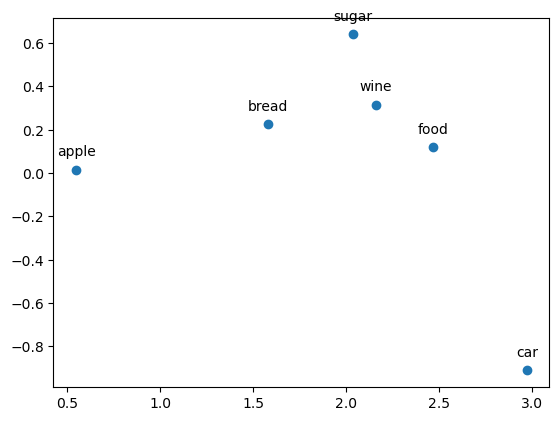

In [17]:
words = ['bread', 'apple', 'food', 'wine', 'sugar', 'car']
xs = [svd_w2v_matrix[w2v_model.wv.key_to_index[w]][0] for w in words]
ys = [svd_w2v_matrix[w2v_model.wv.key_to_index[w]][1] for w in words]

draw_labeled_scatter_plot(xs, ys, words)

Die Ergebnisse stehen nicht im krassen Gegensatz, aber es lassen sich durchaus Unterschiede feststellen, z.B. dass `food` näher an `bread` und `sugar` heranrückt, wohingegen `apple` eher davon wegrückt. Woran könnte das liegen?

### Vortrainierte Word2Vec-Lexika

Spätestens bei der Visualisierung der Vektoren dürfte aufgefallen sein, dass viele Wortformen fehlen. Außerdem merkt man den Vektoren manchmal an, dass die Datengrundlage sehr dünn ist und die Bedeutungen der Wortformen nur unzureichend abgedeckt ist. 

Zum Glück gibt es ein großes, vortrainiertes Vektoren-Lexikon von Google, das mit `gensim.downloader.load()` einmalig heruntergeladen und aktiviert werden kann. ACHTUNG: Es werden 1,6 GB heruntergeladen!

In [18]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')
print(api.load('word2vec-google-news-300', return_path=True))

/Users/dr.elsherif/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


Das Vektoren-Lexikon wurde anhand des Google-News-Corpus mit 100 Milliarden (!) Worttoken generiert und umfasst 3 Millionen Wortformen mit jeweils 300 Dimensionen.

In [19]:
print("Anzahl der Wortformen: ", len(wv))
print("Anzahl der Dimensionen: ", len(wv['the']))

Anzahl der Wortformen:  3000000
Anzahl der Dimensionen:  300


Da hier eher nicht mit Abdeckungslücken zu rechnen ist, werden wir dieses Modell im Weiteren verwenden.

# Anwendungsfälle

## Rechnen mit Vektoren 

Fangen wir mit einer kleinen Anwendung hat, die 2013 jedoch hohe Wellen geschlagen hatte: das Vektor-Offset-Verfahren [(Mikolov, Yih & Zweig 2013)](https://aclanthology.org/N13-1090/). Die Idee ist, dass man Vektorrepräsentationen mittels Addition und Substraktion miteinander kombiniert. Hier ein vielzitiertes Beispiel:  

$$\vec{\text{king}} - \vec{\text{man}} + \vec{\text{woman}} = \vec{\text{queen}}$$

Probieren wir das gleich einmal aus: 

In [20]:
wv.similar_by_vector(wv['king']-wv['man']+wv['woman'])

[('king', 0.8449392318725586),
 ('queen', 0.7300516366958618),
 ('monarch', 0.6454660296440125),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

Für ein *unüberwachtes* Verfahren ist das nicht schlecht. Vielleicht sogar noch besser funktionieren in dieser Hinsicht Hauptstädte und Länder:

In [21]:
wv.similar_by_vector(wv['Paris']-wv['France']+wv['Germany'])

[('Berlin', 0.7628204822540283),
 ('Frankfurt', 0.7316751480102539),
 ('Dusseldorf', 0.69833904504776),
 ('Paris', 0.675622820854187),
 ('Munich', 0.673683226108551),
 ('Germany', 0.6483182907104492),
 ('Cologne', 0.6413757801055908),
 ('Düsseldorf', 0.6358515024185181),
 ('Stuttgart', 0.6339588165283203),
 ('Budapest', 0.62042635679245)]

Oder Hauptstädte und Fastfood:

In [22]:
wv.similar_by_vector(wv['currywurst']-wv['Berlin']+wv['Paris'])

[('currywurst', 0.7099953889846802),
 ('pâtisserie', 0.620357096195221),
 ("L'_Arpège", 0.6122303009033203),
 ('Pierre_Hermé', 0.6018440127372742),
 ('croque_monsieur', 0.5906012654304504),
 ('pommes_frites', 0.5892887115478516),
 ("L'_Ami_Louis", 0.5832886099815369),
 ('brasseries', 0.5763248801231384),
 ('boulangerie', 0.575859546661377),
 ('Ladurée', 0.5748114585876465)]

Erklärt wird das damit, dass Word2Vec **Analogien** lernen kann wie: *king* ist für *queen*, was *man* für *woman* ist. Diese Analogien werden im Vektorraum als Offset-Vektor modelliert, also als Unterschied zwischen $\vec{\text{king}}$ und $\vec{\text{queen}}$, der ziemlich genau dem Unterschied von $\vec{\text{man}}$ und $\vec{\text{woman}}$ zu entsprechen scheint. Mikolov, Yih & Zweig (2013) veranschaulichen das mit folgendem Diagramm:

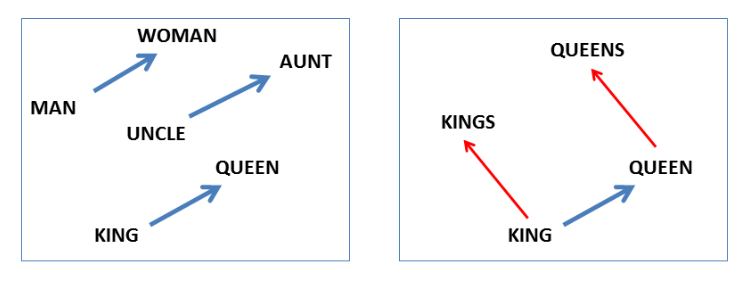

Das erstaunliche ist, dass solche semantischen Bezüge automatisch und ohne menschlichen Eingriff nur anhand von (zugegebenermaßen) sehr vielen Daten gelernt werden.

##  Word Sense Disambiguation

Wir haben gesehen, dass Word Embeddings wie die von Word2Vec semantische Bezüge repräsentieren können, gleichzeitig aber **von der Wortform abstrahieren**. Das heißt, es lassen sich Punkte im Vektorraum konstruieren, für die (zumindest in den zur Verfügung stehenden Daten) keine Wortform existiert. Für solche Punkte können aber leicht Wortformen mit einem ähnlichen Vektor ermittelt werden. Diese Eigenschaft, von der konkreten Wortform zu abstrahieren, kann in einer Reihe von NLP-Anwendungen ausgenutzt werden, insbesondere wenn wenige Daten vorliegen.

Ein Bereich mit notorischer Datenknappheit ist die **Word Sense Disambiguation (WSD)**, die wir ja in diesem Kurs schon behandelt haben, zum Beispiel das Lesk-Verfahren. 

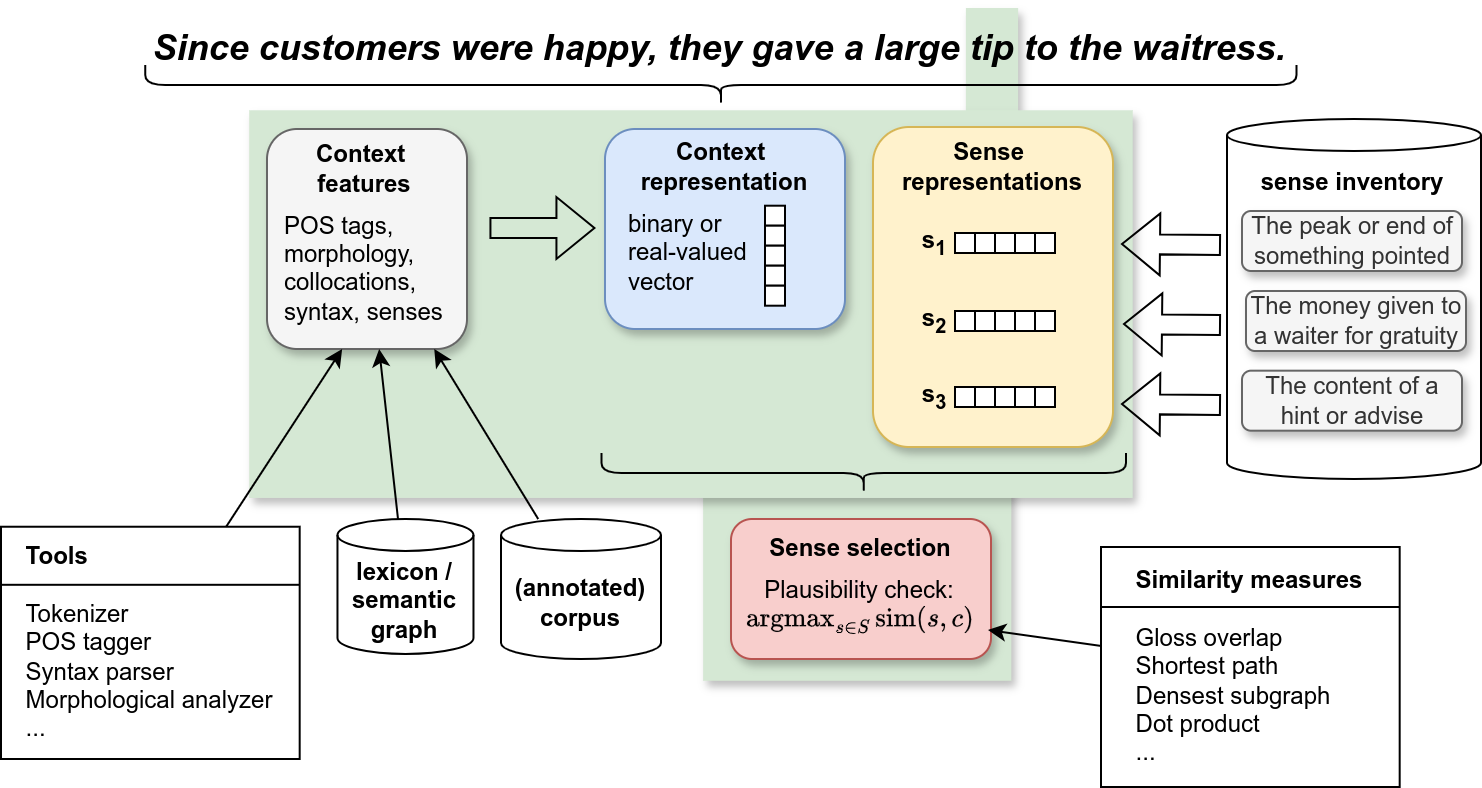

Zur Erinnerung: Die Idee des **Lesk-Verfahrens** ist, die Worte im Kontext eines Targets mit den Worten in den Glossen seiner (WordNet-)Bedeutungsrepräsentationen zu vergleichen, z.B. durch Überschneidung: Seien $\Sigma_w$ die Bedeutungen eines Wortes $w$ in einem Kontext $K$. Diejenige Bedeutung in $\Sigma_w$, dessen Beschreibung (Glosse, Beispielverwendung) die größte Überschneidung mit $K$ hat, wird als Bedeutung von $w$ in $K$ ausgegeben. Kurz gesagt: 

$$L(w,K) = \arg\max_{\sigma_1,...,\sigma_n \in \Sigma_w)} gloss(\sigma_i) \cap K$$

**Ein Beispiel:** Das Wort *bank* hat im Englischen die Bedeutungen `bank.n.01` und `bank.n.02` mit den folgenden beiden Glossen:

In [23]:
from nltk.corpus import wordnet as wn
print('bank.n.01: ' + wn.synset('bank.n.01').definition())
print('bank.n.02: ' + wn.synset('bank.n.02').definition())

bank.n.01: sloping land (especially the slope beside a body of water)
bank.n.02: a financial institution that accepts deposits and channels the money into lending activities


Wenn $K = $*The water washed away the sandy bank of the river*, dann würde der Lesk-Algorithmus die Bedeutung `bank.n.01` ausgeben, da die Überschneidung zwischen $K$ und `wn.synset('bank.n.01').definition()` abzüglich Stopwörter größer ist und *water* enthält. 

Wir hatten festgestellt, dass das Lesk-Verfahren zu wesentlich schlechteren Ergebnissen führt als etwa die graph-basierten Verfahren. Die Accuracy lag nur bei $20$–$30 \%$. Kein Wunder, denn die Überschneidung von Glosse und Kontext ist ein sehr oberflächliches Maß und abstrahiert kaum. 

### <span style="color:red">Aufgaben I</span>

Da es dem Lesk-Verfahren bisher an Abstraktionstiefe zu mangeln scheint, werden wir versuchen, das Lesk-Verfahren mit Word2Vec-Repräsentationen zu "boostern". 

Eine Möglichkeit besteht zum Beispiel darin, für jede Bedeutung/Glosse zu quantifizieren, wie ähnlich die Vektoren der jeweils enthaltenen Nomen zu den Nomen-Vektoren im Kontext sind. Statt der Wortformen wird also die Cosinus-Ähnlichkeit der Wortvektoren betrachtet.

Wir nehmen dafür dieselben Daten wie in der damaligen Sitzung, in der es darum ging, die verschiedenen Lesarten von *interest* je nach Kontext korrekt zu disambiguieren.

In [24]:
# A map of SENSEVAL senses to WordNet 3.0 senses.
# SENSEVAL-2 uses WordNet 1.7, which is no longer installable on most modern
# machines and is not the version that the NLTK comes with.
# As a consequence, we have to manually map the following
# senses to their equivalent(s).
SV_SENSE_MAP = {
    "HARD1": ["difficult.a.01"],    # not easy, requiring great physical or mental
    "HARD2": ["hard.a.02",          # dispassionate
              "difficult.a.01"],
    "HARD3": ["hard.a.03"],         # resisting weight or pressure
    "interest_1": ["interest.n.01"], # readiness to give attention
    "interest_2": ["interest.n.03"], # quality of causing attention to be given to
    "interest_3": ["pastime.n.01"],  # activity, etc. that one gives attention to
    "interest_4": ["sake.n.01"],     # advantage, advancement or favor
    "interest_5": ["interest.n.05"], # a share in a company or business
    "interest_6": ["interest.n.04"], # money paid for the use of money
    "cord": ["line.n.18"],          # something (as a cord or rope) that is long and thin and flexible
    "formation": ["line.n.01","line.n.03"], # a formation of people or things one beside another
    "text": ["line.n.05"],                 # text consisting of a row of words written across a page or computer screen
    "phone": ["telephone_line.n.02"],   # a telephone connection
    "product": ["line.n.22"],       # a particular kind of product or merchandise
    "division": ["line.n.29"],      # a conceptual separation or distinction
    "SERVE12": ["serve.v.02"],       # do duty or hold offices; serve in a specific function
    "SERVE10": ["serve.v.06"], # provide (usually but not necessarily food)
    "SERVE2": ["serve.v.01"],       # serve a purpose, role, or function
    "SERVE6": ["service.v.01"]      # be used by; as of a utility
}

from nltk.corpus import senseval
interestGoldData = [[SV_SENSE_MAP[inst.senses[0]][0],inst.position,inst.context] 
                        for inst in senseval.instances('interest.pos')]
interestTestData = [['', inst[1], inst[2]] for inst in interestGoldData]

print(interestGoldData[0])
print(interestTestData[0])

['interest.n.04', 18, [('yields', 'NNS'), ('on', 'IN'), ('money-market', 'JJ'), ('mutual', 'JJ'), ('funds', 'NNS'), ('continued', 'VBD'), ('to', 'TO'), ('slide', 'VB'), (',', ','), ('amid', 'IN'), ('signs', 'VBZ'), ('that', 'IN'), ('portfolio', 'NN'), ('managers', 'NNS'), ('expect', 'VBP'), ('further', 'JJ'), ('declines', 'NNS'), ('in', 'IN'), ('interest', 'NN'), ('rates', 'NNS'), ('.', '.')]]
['', 18, [('yields', 'NNS'), ('on', 'IN'), ('money-market', 'JJ'), ('mutual', 'JJ'), ('funds', 'NNS'), ('continued', 'VBD'), ('to', 'TO'), ('slide', 'VB'), (',', ','), ('amid', 'IN'), ('signs', 'VBZ'), ('that', 'IN'), ('portfolio', 'NN'), ('managers', 'NNS'), ('expect', 'VBP'), ('further', 'JJ'), ('declines', 'NNS'), ('in', 'IN'), ('interest', 'NN'), ('rates', 'NNS'), ('.', '.')]]


<span style="color:red">A1:</span> Vervollständigen Sie die Funktion `lesk_disambiguate_interest` und implementieren Sie dabei eine Variante des Lesk-Algorithmus, die Word2Vec-Vektoren verwendet! Führen Sie für die Synset-Glossen und Synset-Beispiele bei Bedarf die folgenden **Vorverarbeitungsschritte** aus: 

1. Wort- und Satz-Tokenisierung
2. Entfernung von Stopwörtern (`from nltk.corpus import stopwords`), Satzzeichen etc.

Die resultierende Accuracy soll bei **mindestens $50 \%$** liegen!

In [25]:
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
wnl = WordNetLemmatizer()
punctuation = string.punctuation

############ Mein code ##############
word2vec = KeyedVectors.load_word2vec_format("/Users/dr.elsherif/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz", binary=True) 
wnl = WordNetLemmatizer()
punctuation = string.punctuation
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [wnl.lemmatize(token) for token in tokens if token not in stop_words and token not in punctuation]
    return tokens
####################################


def lesk_disambiguate_interest(inst) :
    outsyns = inst[0]
    position = inst[1]
    context = inst[2]   # [('yields', 'NNS'), ('on', 'IN'), ('money-market', 'JJ'), ...]
    
    # Lösung A1
    
    ############ Mein code ##############
    # context wörter extraktieren
    context_words = [wnl.lemmatize(word.lower()) for word, pos in context 
                     if word.lower() not in stop_words and word not in punctuation]
    
    # synsets für 'interest' Synsets für und glosses/examples vorverarbeiten
    interest_synsets = wn.synsets('interest', pos=wn.NOUN)
    
    max_similarity = -1
    best_synset = None
    
    for synset in interest_synsets:
        # glosses/examples vorverarbeiten
        gloss = preprocess_text(synset.definition())
        examples = [preprocess_text(example) for example in synset.examples()]
        
        # gloss und examples in einer Liste zusammenfassen
        combined_gloss = gloss + [word for example in examples for word in example]
        
        # similarity mit Word2Vec berechnen
        similarity_scores = []
        for gloss_word in combined_gloss:
            for context_word in context_words:
                if gloss_word in word2vec and context_word in word2vec:
                    similarity = cosine_similarity(
                        [word2vec[gloss_word]], [word2vec[context_word]]
                    )[0][0]
                    similarity_scores.append(similarity)
        
        # Average similarity für das aktuelle synset
        if similarity_scores:
            avg_similarity = np.mean(similarity_scores)
            if avg_similarity > max_similarity:
                max_similarity = avg_similarity
                best_synset = synset.name()
    
    if best_synset:
        return best_synset
    else:
        return outsyns
    ####################################
        
    #return outsyns  

In [26]:
# Test für A1 (nicht verändern)

from tqdm import tqdm
sumTrueDisambiguations = 0
sumFalseDisambiguations = 0

for i in tqdm(range(len(interestTestData))):
    if lesk_disambiguate_interest(interestTestData[i]) == interestGoldData[i][0] :
        sumTrueDisambiguations += 1
    else :
        sumFalseDisambiguations += 1

accuracyDisambiguations = sumTrueDisambiguations /(sumTrueDisambiguations + sumFalseDisambiguations)

#print("Accuracy: {}".format(accuracyDisambiguations))
print("Accuracy: {:.2f}%".format(accuracyDisambiguations* 100))

100%|███████████████████████████████████████| 2368/2368 [07:07<00:00,  5.54it/s]

Accuracy: 64.74%


# Literaturangaben

Firth, J. R. 1957. Papers in Linguistics 1934–1951. Oxford Univ. Press, London.

Harris, Zellig S. 1954. Distributional Structure. WORD 10(2–3). 146–162. https://doi.org/10.1080/00437956.1954.11659520.

Jurafsky, Daniel & James H. Martin. 2021. Speech and Language Processing. An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition. Draft of September 21, 2021. https://web.stanford.edu/jurafsky/slp3/ed3book.pdf.

Mikolov, Tomas, Kai Chen, Gregory S. Corrado & Jeffrey Dean. 2013. Efficient estimation of word representations in vector space. ms. http://arxiv.org/abs/1301.3781/.

Mikolov, Tomas, Wen-tau Yih & Geoffrey Zweig. 2013. Linguistic Regularities in Continuous Space Word Representations. In Proceedings of the 2013 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies, 746–751. Atlanta, Georgia: Association for Computational Linguistics. https://aclanthology.org/N13-1090.

Wittgenstein, Ludwig. 1953/1984. Philosophische Untersuchungen. In Werkausgabe Band 1. Frankfurt a.M.: Suhrkamp.